In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.svm import SVC


In [2]:
train = pd.read_csv('/content/drive/MyDrive/ML-Data/scaled_train.csv')
test = pd.read_csv('/content/drive/MyDrive/ML-Data/scaled_test.csv')

train_feature_selection = pd.read_csv('/content/drive/MyDrive/ML-Data/scaled_train_feature_selection.csv')
test_feature_selection = pd.read_csv('/content/drive/MyDrive/ML-Data/scaled_test_feature_selection.csv')

train_binary = pd.read_csv('/content/drive/MyDrive/ML-Data/scaled_train_binary.csv')
test_binary = pd.read_csv('/content/drive/MyDrive/ML-Data/scaled_test_binary.csv')

train_binary_feature_selection = pd.read_csv('/content/drive/MyDrive/ML-Data/scaled_train_binary_feature_selection.csv')
test_binary_feature_selection = pd.read_csv('/content/drive/MyDrive/ML-Data/scaled_test_binary_feature_selection.csv')

def get_XY(data):
  X = data.drop(['labels'] , axis=1).values
  y = data['labels'].values

  return X,y

In [3]:
X_train, y_train = get_XY(train)
X_test, y_test = get_XY(test)

X_train_binary, y_train_binary = get_XY(train_binary)
X_test_binary, y_test_binary = get_XY(test_binary)

X_train_fs, y_train_fs = get_XY(train_feature_selection)
X_test_fs, y_test_fs = get_XY(test_feature_selection)

X_train_binary_fs, y_train_binary_fs = get_XY(train_binary_feature_selection)
X_test_binary_fs, y_test_binary_fs = get_XY(test_binary_feature_selection)


print("Binary Classification Dataset")
print(X_train_binary.shape)
print(X_test_binary.shape)
print("Multi Class Classification Dataset")
print(X_train.shape)
print(X_test.shape)
print("Binary Classification Dataset with Feature Selection")
print(X_train_binary_fs.shape)
print(X_test_binary_fs.shape)
print("Multi Class Classification Dataset with Feature Selection")
print(X_train_fs.shape)
print(X_test_fs.shape)

Binary Classification Dataset
(125973, 41)
(22544, 41)
Multi Class Classification Dataset
(125973, 41)
(22544, 41)
Binary Classification Dataset with Feature Selection
(125973, 27)
(125973, 27)
Multi Class Classification Dataset with Feature Selection
(125973, 27)
(22544, 27)


In [ ]:
linear_svm = SVC(kernel='linear')
poly_svm = SVC(kernel='poly', degree=3)
rbf_svm = SVC(kernel='rbf')
sigmoid_svm = SVC(kernel='sigmoid')

In [9]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20],
    'min_samples_leaf': [2, 5],
}

rf_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=3)

grid_search.fit(X_train_binary_fs, y_train_binary_fs)

print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'n_estimators': 300}


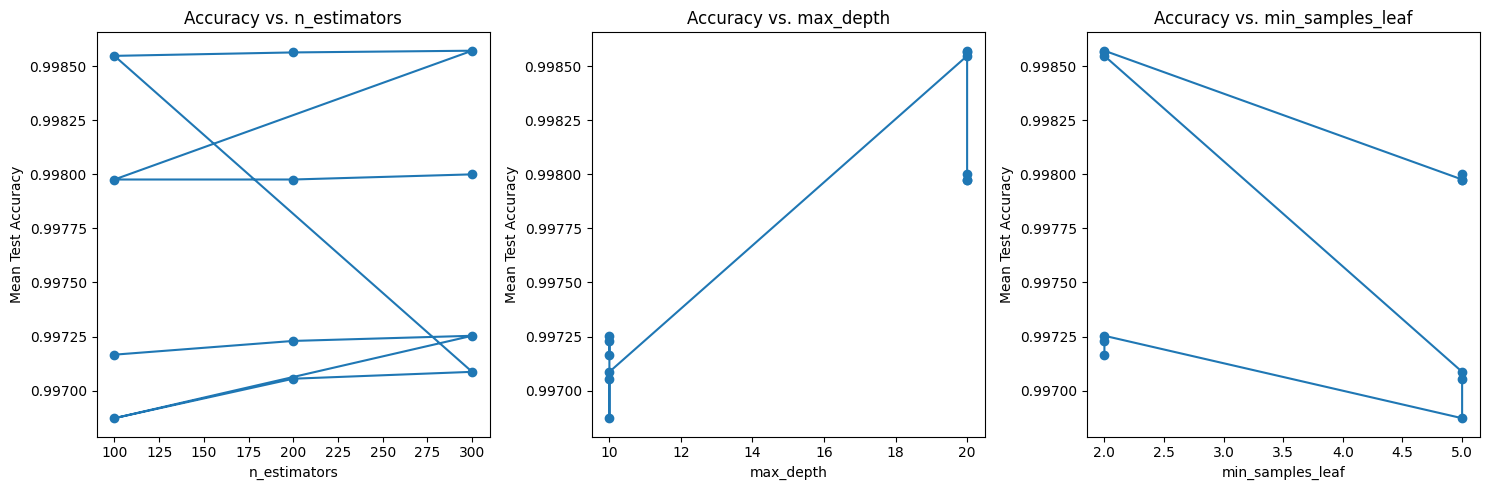

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'n_estimators': 300}


In [10]:
cv_results = grid_search.cv_results_

mean_test_scores = cv_results['mean_test_score']
params = cv_results['params']

n_estimators_values = [param['n_estimators'] for param in params]
max_depth_values = [param['max_depth'] for param in params]
min_samples_leaf_values = [param['min_samples_leaf'] for param in params]

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].plot(n_estimators_values, mean_test_scores, marker='o')
ax[0].set_title('Accuracy vs. n_estimators')
ax[0].set_xlabel('n_estimators')
ax[0].set_ylabel('Mean Test Accuracy')

ax[1].plot(max_depth_values, mean_test_scores, marker='o')
ax[1].set_title('Accuracy vs. max_depth')
ax[1].set_xlabel('max_depth')
ax[1].set_ylabel('Mean Test Accuracy')

ax[2].plot(min_samples_leaf_values, mean_test_scores, marker='o')
ax[2].set_title('Accuracy vs. min_samples_leaf')
ax[2].set_xlabel('min_samples_leaf')
ax[2].set_ylabel('Mean Test Accuracy')

plt.tight_layout()
plt.show()


print("Best Parameters:", grid_search.best_params_)

In [64]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['auto', 'scale'],
    'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
    'degree' : [3]
}

svm_classifier = SVC()

grid_search_svm = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=3)

grid_search_svm.fit(X_train_binary_fs, y_train_binary_fs)

cv_results_svm = grid_search_svm.cv_results_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


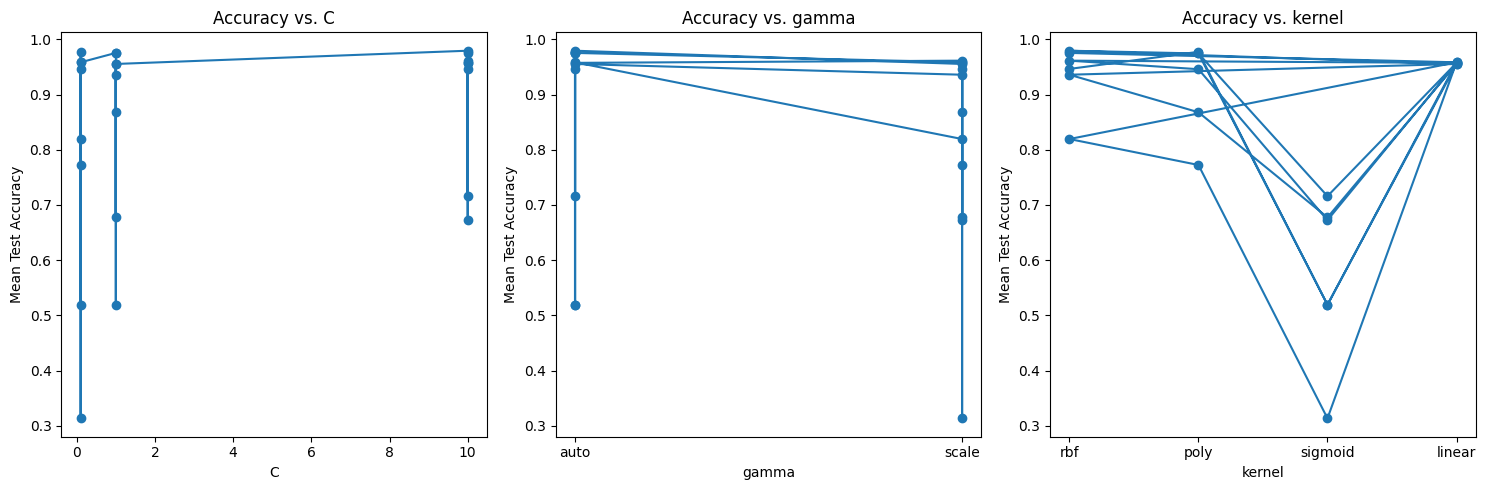

Best Parameters: {'C': 10, 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf'}


In [65]:
mean_test_scores = cv_results_svm['mean_test_score']
params = cv_results_svm['params']

C_values = [param['C'] for param in params]
gamma_values = [param['gamma'] for param in params]
kernel_values = [param['kernel'] for param in params]

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].plot(C_values, mean_test_scores, marker='o')
ax[0].set_title('Accuracy vs. C')
ax[0].set_xlabel('C')
ax[0].set_ylabel('Mean Test Accuracy')

ax[1].plot(gamma_values, mean_test_scores, marker='o')
ax[1].set_title('Accuracy vs. gamma')
ax[1].set_xlabel('gamma')
ax[1].set_ylabel('Mean Test Accuracy')

ax[2].plot(kernel_values, mean_test_scores, marker='o')
ax[2].set_title('Accuracy vs. kernel')
ax[2].set_xlabel('kernel')
ax[2].set_ylabel('Mean Test Accuracy')

plt.tight_layout()
plt.show()

print("Best Parameters:", grid_search_svm.best_params_)